# ASSIGNMENT 6 : CLUSTERING MODELS

# IMPORT REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, FunctionTransformer, MinMaxScaler, OrdinalEncoder, PowerTransformer, RobustScaler
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# DATASET EXPLORATION

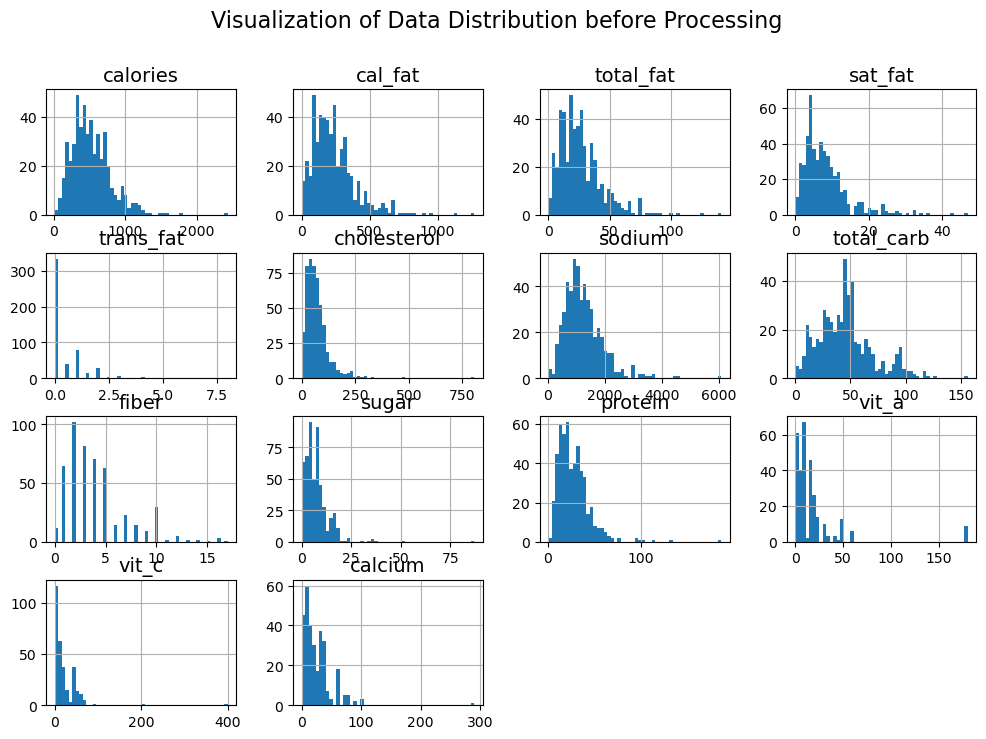

In [24]:
# Load & Examine Dataset
ff_df = pd.read_csv('fastfood.csv')

# Removing Duplicates
ff_df.drop_duplicates(inplace=True)

# Data Visualization
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ff_df.hist(bins=50, figsize=(12, 8))
plt.suptitle("Visualization of Data Distribution before Processing", fontsize=16)
plt.show()


# RE-CATEGORIZE restaurant BASED ON FATCONTENT OF FOODS SOLD BY THEM

In [25]:
# replace NA with 0
ff_df = ff_df.fillna(0)
ff_df = ff_df.drop(['salad'], axis=1)

# Calculate the mean of total_fat for each unique category in restaurant
mean_fat_by_restaurant = ff_df.groupby('restaurant')['total_fat'].mean()
mean_fat_by_restaurant_sorted = mean_fat_by_restaurant.sort_values(ascending=False)
print(mean_fat_by_restaurant_sorted)


restaurant
Sonic          37.641509
Burger King    36.814286
Mcdonalds      31.807018
Dairy Queen    28.857143
Arbys          26.981818
Taco Bell      20.858407
Subway         18.479167
Chick Fil-A    16.148148
Name: total_fat, dtype: float64


In [32]:
# Convert restaurant names to lowercase and strip whitespace
ff_df['restaurant'] = ff_df['restaurant'].str.lower().str.strip()

fat_categories = {
    'mcdonalds': 'HighFat',
    'sonic': 'HighFat',
    'burger king': 'HighFat',
    'arbys': 'MedFat',
    'dairy queen': 'MedFat',
    'subway': 'LowFat',
    'taco bell': 'MedFat',
    'chick fil-a': 'LowFat'
}

# Apply the mapping to the 'restaurant' column to update it with fat_categories
ff_df['restaurant'] = ff_df['restaurant'].map(lambda x: fat_categories.get(x, 'Unknown'))

# PREPROCESSING

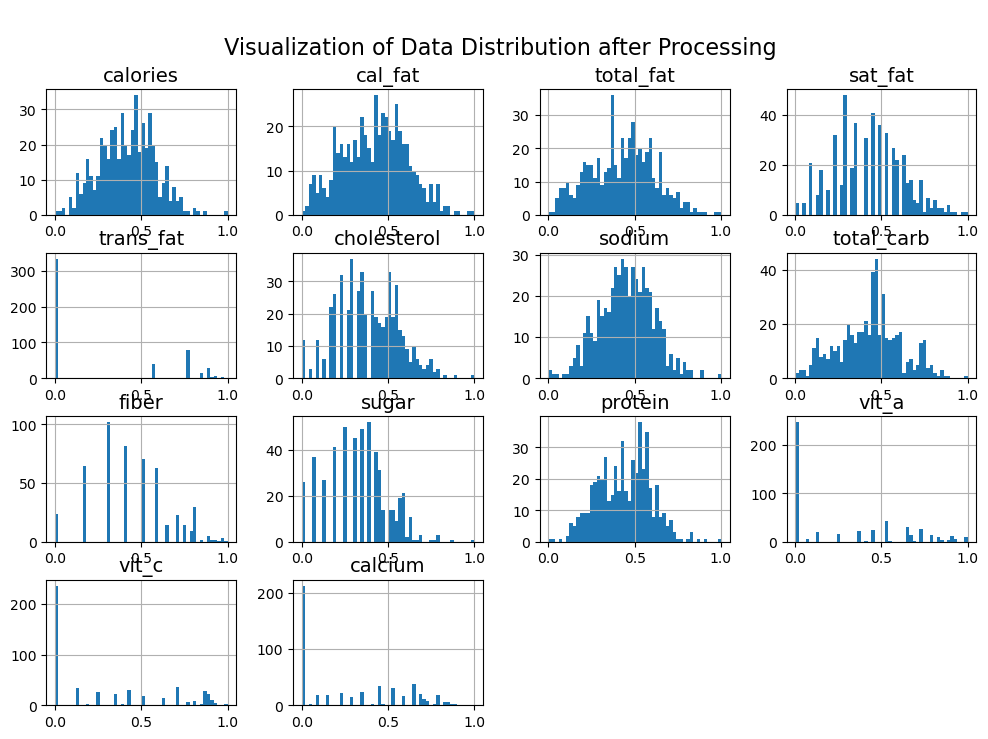

In [27]:
# Drop unwanted columns
ff_df_processed = ff_df.drop(['item', 'restaurant'], axis=1)

# Define the pipeline for numeric columns
pipeline = Pipeline([
    
    ("robust_scaler", RobustScaler()),
    ("std_scaler", StandardScaler()),
    ("log_transform", PowerTransformer(method='yeo-johnson')),
    ("scaler", MinMaxScaler())
])


ff_df_processed = pipeline.fit_transform(ff_df_processed)


# Convert the numpy array back to a DataFrame with appropriate column names
ff_df_processed = pd.DataFrame(ff_df_processed, columns=ff_df.drop(['item', 'restaurant'], axis=1).columns)

# DATA VISUALIZATION AFTER PROCESSING
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ff_df_processed.hist(bins=50, figsize=(12, 8))
plt.suptitle("\n Visualization of Data Distribution after Processing", fontsize=16)
plt.show()


# PAIR PLOT

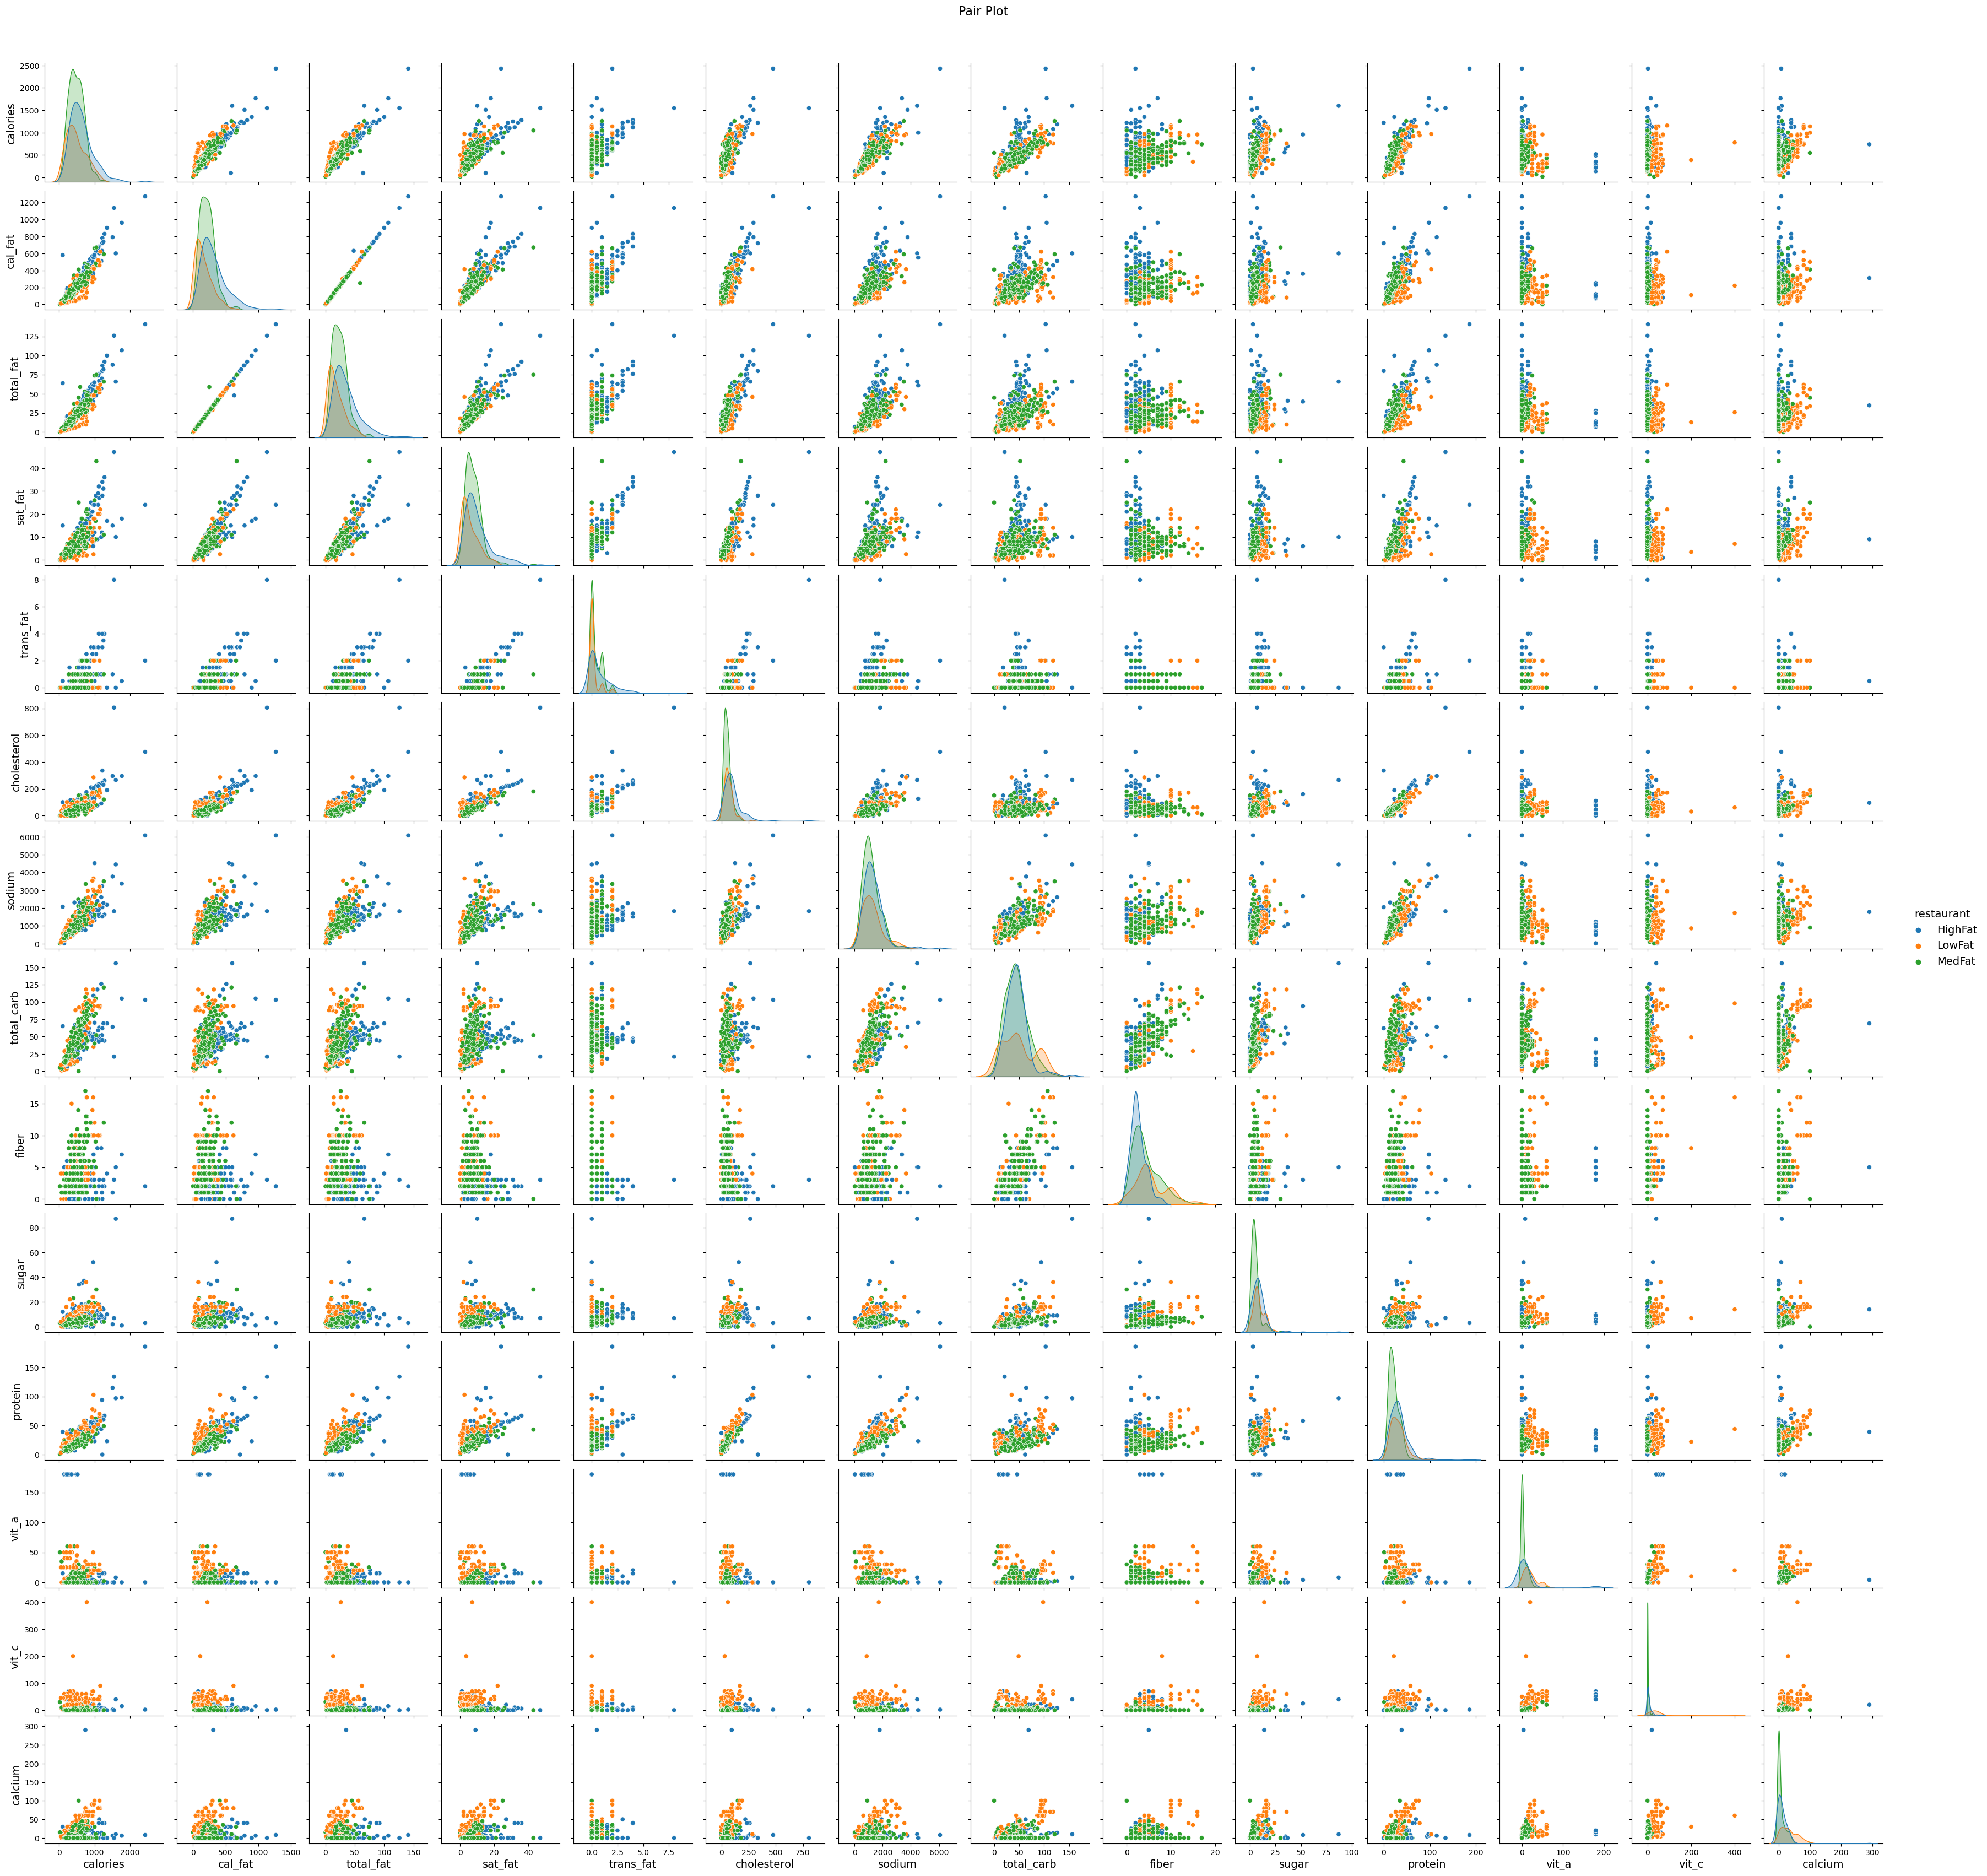

In [28]:
# Select numeric columns for pair plot
pair_plot = sns.pairplot(ff_df.drop(['item'], axis=1), hue='restaurant')
pair_plot.fig.suptitle("Pair Plot", fontsize=16)
pair_plot.fig.subplots_adjust(top=0.95)
plt.show()

# EMBEDDINGS

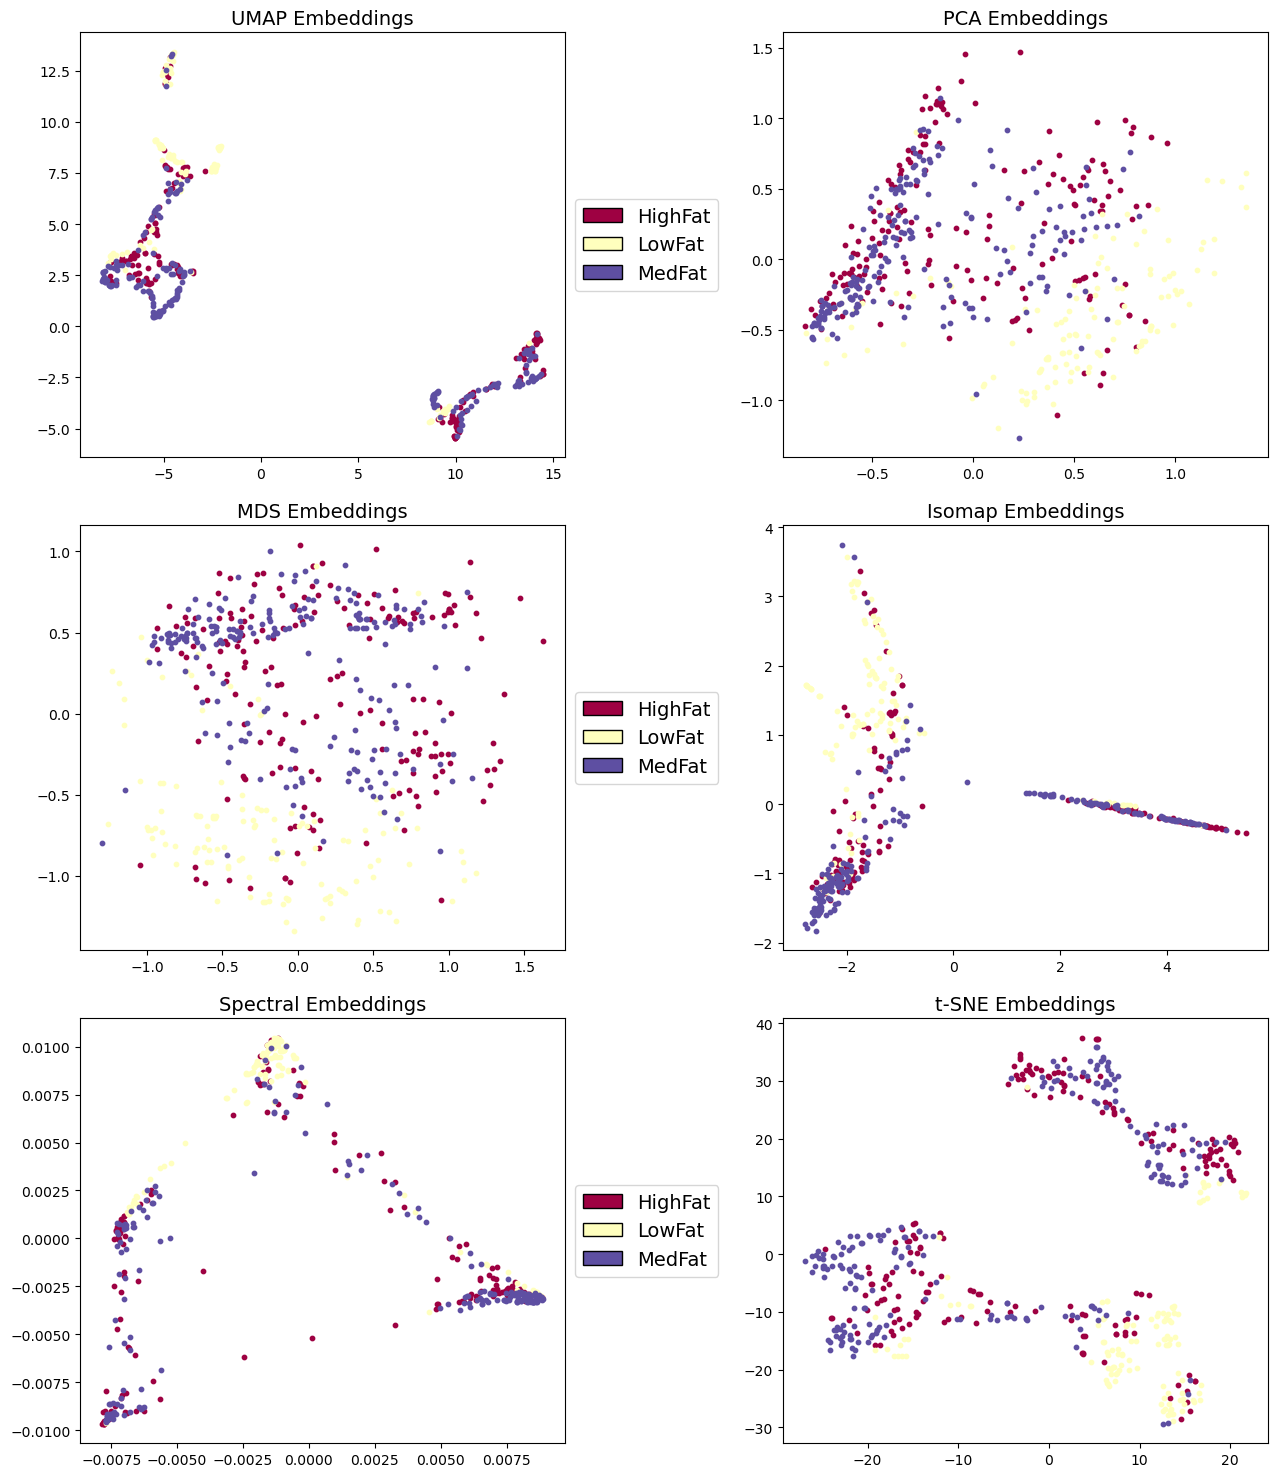

In [7]:
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE

# Now the data is transformed and we can apply PCA and UMAP
umap_embeddings = umap.UMAP(n_components=2, random_state=42).fit_transform(ff_df_processed)
pca_embeddings = PCA(n_components=2, random_state=42).fit_transform(ff_df_processed)

# Apply MDS
mds_embeddings = MDS(n_components=2, random_state=42).fit_transform(ff_df_processed)

# Apply Isomap
isomap_embeddings = Isomap(n_components=2).fit_transform(ff_df_processed)

# Apply Spectral Embedding
spectral_embeddings = SpectralEmbedding(n_components=2, random_state=42).fit_transform(ff_df_processed)

# Apply t-SNE
tsne_embeddings = TSNE(n_components=2, random_state=42).fit_transform(ff_df_processed)

# Define colors for the restaurants
restaurants = ff_df['restaurant'].astype('category').cat.categories
colors = plt.cm.Spectral(np.linspace(0, 1, len(restaurants)))
color_dict = {restaurant: color for restaurant, color in zip(restaurants, colors)}

# Function to plot embeddings
def plot_embeddings(embeddings, title, subplot_index):
    plt.subplot(3, 2, subplot_index)
    for restaurant, color in color_dict.items():
        indices = ff_df['restaurant'] == restaurant
        plt.scatter(embeddings[indices, 0], embeddings[indices, 1], c=[color], s=10)
    plt.title(title)
    # Add legend only for subplots 1, 3, and 5
    if subplot_index in [1, 3, 5]:
        legend_elements = [Patch(facecolor=color, edgecolor='k', label=restaurant) for restaurant, color in color_dict.items()]
        plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting the embeddings
plt.figure(figsize=(13, 15))

# UMAP Embeddings
plot_embeddings(umap_embeddings, "UMAP Embeddings", 1)

# PCA Embeddings
plot_embeddings(pca_embeddings, "PCA Embeddings", 2)

# MDS Embeddings
plot_embeddings(mds_embeddings, "MDS Embeddings", 3)

# Isomap Embeddings
plot_embeddings(isomap_embeddings, "Isomap Embeddings", 4)

# Spectral Embeddings
plot_embeddings(spectral_embeddings, "Spectral Embeddings", 5)

# t-SNE Embeddings
plot_embeddings(tsne_embeddings, "t-SNE Embeddings", 6)

plt.tight_layout()
plt.show()


## ANALYSIS OF EMBEDDINGS

### UMAP Embeddings:
    
Provides clear separation of clusters.
Captures the non-linear structure of the data effectively.
Captures both local and global structure.

### PCA Embeddings:

Linear method; less clear separation of clusters.
Shows some grouping but misses complex relationships.

### MDS Embeddings:

Linear method; similar to PCA in terms of performance.
Some grouping but not as effective for non-linear data.

### IsoMAP Embeddings:

Shows potential clusters but less distinct than UMAP and t-SNE.
Captures non-linear structure to some extent.

### Spectral Embeddings:

Non-linear method; good separation of clusters.
Sensitive to the choice of parameters.

### t-SNE Embeddings:

Non-linear method; excellent local structure capture.
Clear separation of clusters but can be sensitive to parameters.

### Conclusion:

Best Embedding: UMAP provides the best overall separation and visualization of clusters in the dataset.
Clustering: The data appears to have non-linear relationships, and UMAP and t-SNE effectively capture these structures.
Number of Clusters: Approximately 3 distinct clusters are observed in the embeddings.

# 1. K MEANS CLUSTERING

In [8]:
K = range(1, 11)

# List to store the sum of squared distances
ssd = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(ff_df_processed)
    ssd.append(kmeans.inertia_)


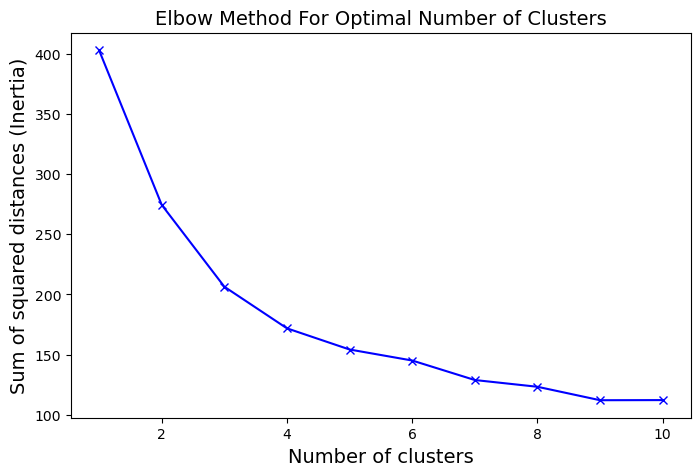

In [9]:
# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [10]:
# Build the k-means clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
ff_df['cluster'] = kmeans.fit_predict(ff_df_processed)

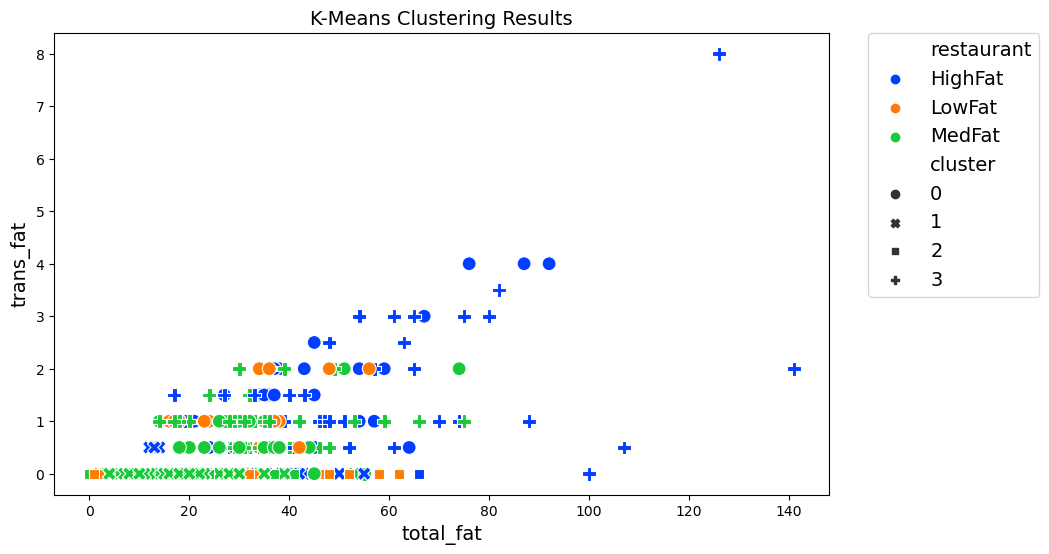

In [11]:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='total_fat', y='trans_fat', hue='restaurant', style='cluster', data=ff_df, palette='bright', s=100)
    plt.title('K-Means Clustering Results')
    plt.xlabel('total_fat')
    plt.ylabel('trans_fat')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

## INTERPRETATION

Cluster 0: Total fat content between 20 and 75 while trans_fat ranges from 0 to 4. Restaurants that have been classified as HighFat & MedFat food items seller fall under this category

Cluster 1: Total fat content between 0 and 68 while trans_fat ranges from 0 to 0.5. Majority of Restaurants that have been classified as MedFat food items seller fall under this category

Cluster 2: Total fat content between 0 and 60 while trans_fat is just 0. Majority of Restaurants that have been classified as MedFat food items seller fall under this category

Cluster 3: Total fat content between 20 and 140 while trans_fat ranges from 0 to 8. Some of the Restaurants that have been classified as MedFat food items seller & majority of sellers of HighFat foods fall under this category


In [12]:
# List members of each cluster by instance_name
clusters = ff_df.groupby('cluster')['item'].apply(list).reset_index()
for index, row in clusters.iterrows():
    print(f"Cluster {row['cluster']}:")
    for instance in row['item']:
        print(f"  - {instance}")

Cluster 0:
  - Single Bacon Smokehouse Burger
  - Double Bacon Smokehouse Burger
  - Grilled Bacon Smokehouse Chicken Sandwich
  - Crispy Bacon Smokehouse Chicken Sandwich
  - Big Mac
  - Double Cheeseburger
  - Double Quarter Pounder® with Cheese
  - Garlic White Cheddar Burger
  - Maple Bacon Dijon 1/4 lb Burger
  - Crispy Maple Bacon Dijon Chicken Sandwich
  - McDouble
  - Pico Guacamole 1/4 lb Burger
  - Quarter Pounder® with Cheese
  - Signature Sriracha Burger
  - Sweet BBQ Bacon 1/4 lb Burger
  - Crispy Sweet BBQ Bacon Chicken Sandwich
  - Hatch Green Chile Cheeseburger
  - Jalapeno Burger
  - Jr. Chili Cheeseburger
  - Jr. Deluxe Cheeseburger
  - Jr. Double Cheeseburger
  - Sonic Bacon Cheeseburger (w/mayo)
  - Sonic Burger W/ Mustard
  - Sonic Burger W/ Ketchup
  - Sonic Burger W/ Mayonnaise
  - Sonic Cheeseburger W/ Mustard
  - Sonic Cheeseburger W/ Ketchup
  - Sonic Cheeseburger W/ Mayonnaise
  - Super Sonic Bacon Double Cheeseburger (w/mayo)
  - Super Sonic Double Cheesebur

In [13]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(ff_df['trans_fat'], ff_df['cluster'])
completeness = metrics.completeness_score(ff_df['trans_fat'], ff_df['cluster'])
v_measure = metrics.v_measure_score(ff_df['trans_fat'], ff_df['cluster'])
adjusted_rand = metrics.adjusted_rand_score(ff_df['trans_fat'], ff_df['cluster'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(ff_df['trans_fat'], ff_df['cluster'])
silhouette = metrics.silhouette_score(ff_df_processed, ff_df['cluster'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.5224492314339874
Completeness Score: 0.46665970888959185
V-Measure Score: 0.49298109907047516
Adjusted Rand Index: 0.4295936956509919
Adjusted Mutual Information Score: 0.48145706706902364
Silhouette Score: 0.3213769735272435


## ANALYSIS OF CLUSTERING SOLUTION
Based on the metrics, the K-Means clustering solution provides a reasonable balance between cluster homogeneity and completeness.

The clustering solution effectively groups similar items together, as evidenced by the silhouette score.

The clusters provide meaningful insights into the categorization of food items based on their trans_fat content, helping to identify patterns and relationships within the dataset.


# 2. DBSCAN MODEL

In [14]:
# Build a dbscan model on the ff_df_processed dataset with columns Calories and Trans Fat
dbscan = DBSCAN(eps=0.18, min_samples=5)
ff_df['cluster_db'] = dbscan.fit_predict(ff_df_processed[['total_fat', 'trans_fat']])


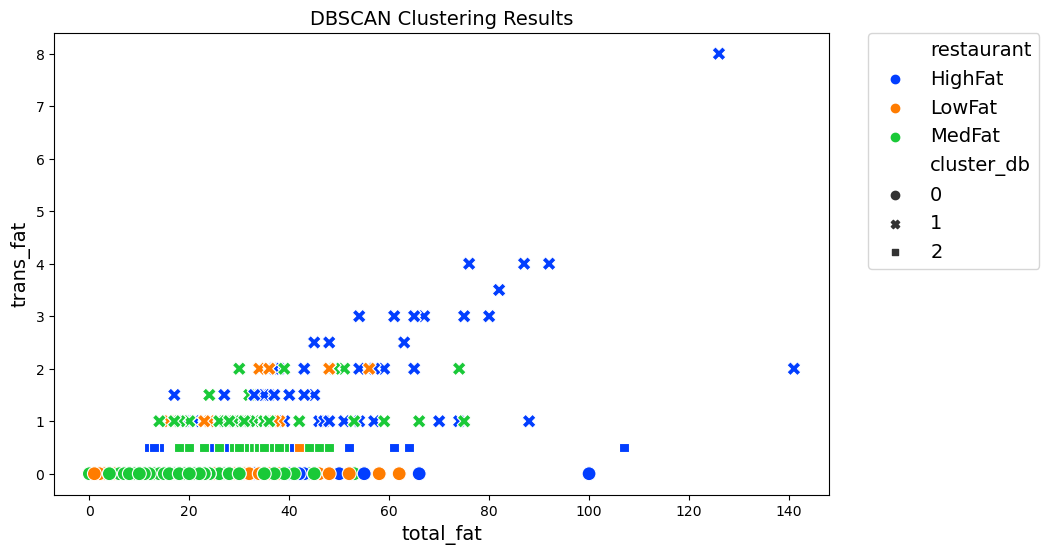

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_fat', y='trans_fat', hue='restaurant', style='cluster_db', palette='bright', data=ff_df, s=100)
plt.title('DBSCAN Clustering Results')
plt.xlabel('total_fat')
plt.ylabel('trans_fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## INTERPRETATION

Cluster 0: Total fat content between 0 and 100 while trans_fat is 0. Majority of Restaurants that have been classified as LowFat & MedFat food items seller fall under this category

Cluster 1: Total fat content between 17 and 140 while trans_fat ranges from 1 to 8. Majority of Restaurants that have been classified as HighFat food items seller and few of MedFat food items sellers fall under this category

Cluster 2: Total fat content between 10 and 110 while trans_fat is just 0.5. Majority of Restaurants that have been classified as MedFat food items seller & few of HighFat food items seller fall under this category


In [16]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(ff_df['trans_fat'], ff_df['cluster_db'])
completeness = metrics.completeness_score(ff_df['trans_fat'], ff_df['cluster_db'])
v_measure = metrics.v_measure_score(ff_df['trans_fat'], ff_df['cluster_db'])
adjusted_rand = metrics.adjusted_rand_score(ff_df['trans_fat'], ff_df['cluster_db'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(ff_df['trans_fat'], ff_df['cluster_db'])
silhouette = metrics.silhouette_score(ff_df_processed, ff_df['cluster_db'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.7042992365102371
Completeness Score: 1.0000000000000002
V-Measure Score: 0.8264971566288754
Adjusted Rand Index: 0.9097253119777551
Adjusted Mutual Information Score: 0.8233610600510542
Silhouette Score: 0.1046594285286688


## ANALYSIS OF CLUSTERING SOLUTION

Provides a high homogeneity and completeness score, indicating that the clusters are well-formed.

The high Adjusted Rand Index and Adjusted Mutual Information Score show strong similarity and agreement with the true labels.

However, the low silhouette score suggests that the clusters might not be very well-separated.

Despite the low silhouette score, DBSCAN effectively identifies outliers and forms clusters based on density, which can be more appropriate for non-linear data structures.

# 3. AGGLOMERATIVE MODEL

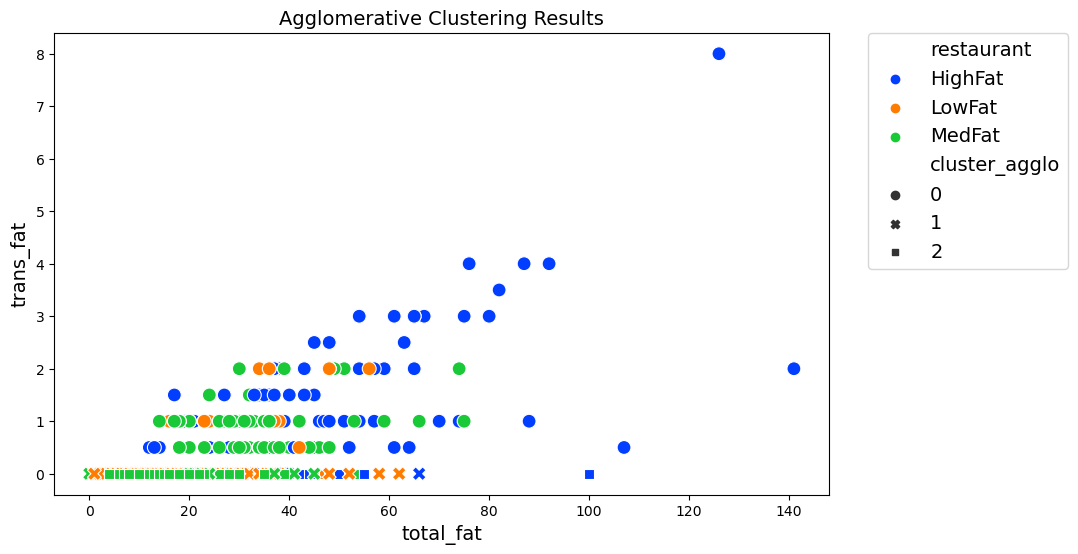

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Build an agglomerative clustering model on the ff_df_processed dataset
agglo = AgglomerativeClustering(n_clusters=3)
ff_df['cluster_agglo'] = agglo.fit_predict(ff_df_processed)


# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_fat', y='trans_fat', hue='restaurant', style='cluster_agglo', data=ff_df, palette='bright', s=100)
plt.title('Agglomerative Clustering Results')
plt.xlabel('total_fat')
plt.ylabel('trans_fat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


## INTERPRETATION

Cluster 0: Total fat content between 10 and 140 while trans_fat ranges from 0.5 to 8. Majority of Restaurants that have been classified as HighFat & MedFat food items seller fall under this category

Cluster 1: Total fat content between 0 and 70 while trans_fat is just 0. Restaurants that have been classified as LowFat food items seller few of MedFat food items sellers fall under this category

Cluster 2: Total fat content between 5 and 55 while trans_fat is just 0. Majority of Restaurants that have been classified as MedFat food items seller fall under this category


In [18]:
# Calculate the metrics
homogeneity = metrics.homogeneity_score(ff_df['trans_fat'], ff_df['cluster_agglo'])
completeness = metrics.completeness_score(ff_df['trans_fat'], ff_df['cluster_agglo'])
v_measure = metrics.v_measure_score(ff_df['trans_fat'], ff_df['cluster_agglo'])
adjusted_rand = metrics.adjusted_rand_score(ff_df['trans_fat'], ff_df['cluster_agglo'])
adjusted_mutual_info = metrics.adjusted_mutual_info_score(ff_df['trans_fat'], ff_df['cluster_agglo'])
silhouette = metrics.silhouette_score(ff_df_processed[['calories', 'trans_fat']], ff_df['cluster_agglo'])

# Display the metrics
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-Measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand}")
print(f"Adjusted Mutual Information Score: {adjusted_mutual_info}")
print(f"Silhouette Score: {silhouette}")

Homogeneity Score: 0.5457358466545749
Completeness Score: 0.5965430377702181
V-Measure Score: 0.5700095208314364
Adjusted Rand Index: 0.39856329931995726
Adjusted Mutual Information Score: 0.5625346968988931
Silhouette Score: 0.285187376261715


## ANALYSIS OF CLUSTERING SOLUTION

Provides moderate homogeneity and completeness scores, indicating a fair formation of clusters.

The moderate Adjusted Rand Index and Adjusted Mutual Information Score show a decent similarity and agreement with the true labels.

The silhouette score suggests that the clusters have a fair density and separation.

This method can effectively identify the hierarchical structure within the data, making it suitable for datasets with nested clusters.

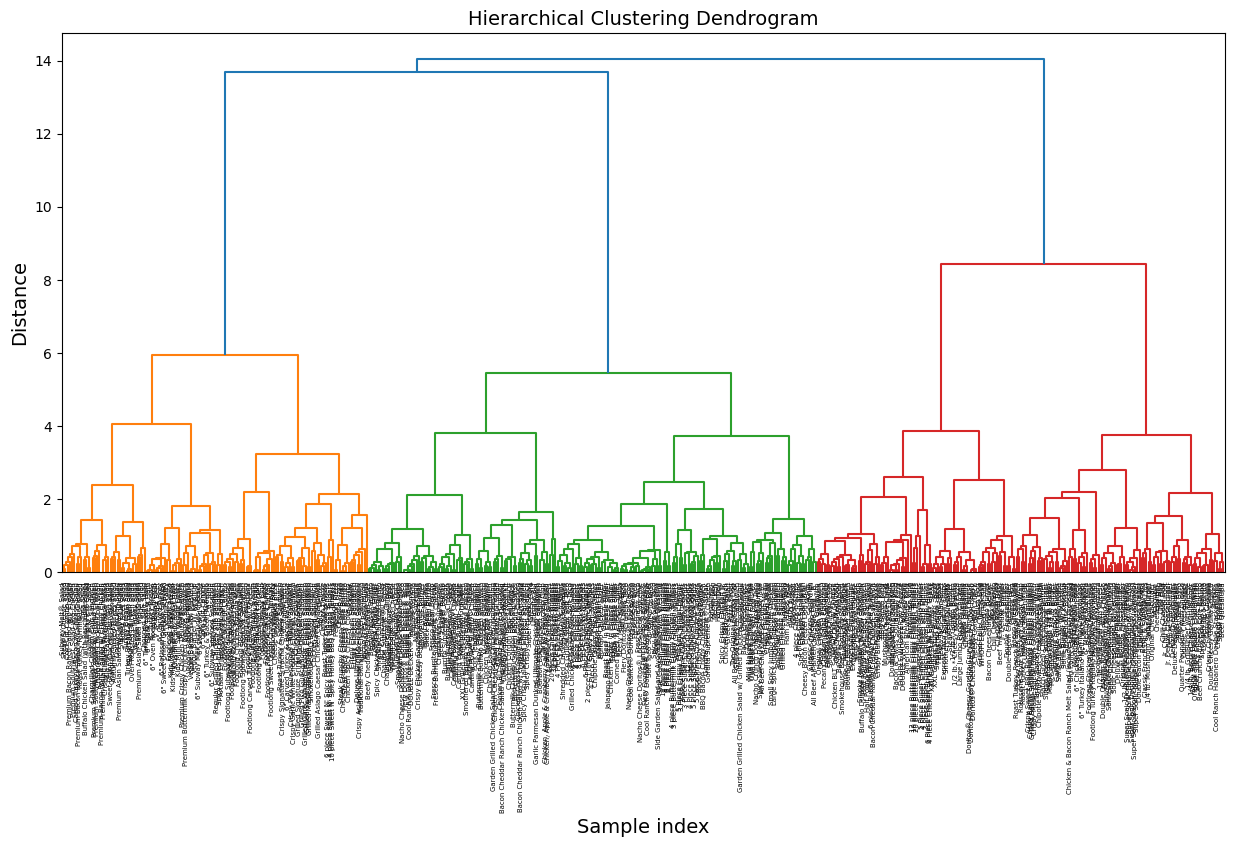

In [19]:
# Create dendrogram
linked = linkage(ff_df_processed, method='ward')
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', labels=ff_df['item'].to_numpy(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# BEST CLUSTERING TECHNIQUE

DBSCAN Clustering emerges as the best technique for this dataset

### JUSTIFICATION

High Homogeneity and Completeness Scores: Indicates well-formed clusters.

High Adjusted Rand Index and Adjusted Mutual Information Score: Shows strong similarity with true labels.

Outlier Identification: DBSCAN effectively identifies outliers, which is beneficial for datasets with noise.

Density-Based Clustering: Suitable for non-linear data structures and discovering clusters of varying shapes and sizes.

Despite the low silhouette score, which suggests possible issues with cluster separation, the overall performance and characteristics of DBSCAN make it the most suitable choice for this particular dataset and clustering task.